<a href="https://colab.research.google.com/github/keshav-hl/Data-Science-Projects/blob/main/Google_Data_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Suppose you are working in a data-driven job role, and you have to answer all these questions.


---



1. First, write a code where, by changing just the keyword, we can search for multiple things.

2. Top 15 countries where the keywords are searched the most, and also create visual representation of it.

3. A world map needs to be plotted showing the countries that search the keyword the most.

4. We need to extract the time-wise interest of the keyword — how it trended in different years.

5. Compare related keywords and plot the graph.

In [ ]:
pip install pytrends matplotlib pandas seaborn plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

Setup pytrend library and keyword define \

In [ ]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = "cloud computing"

Data Request

In [ ]:
pytrends.build_payload([keyword], cat = 0, timeframe = 'today 12-m', geo='', gprop='')

Country wise Intrest

In [ ]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword,ascending = False).head(15)
print(region_data)

              cloud computing
geoName                      
Nepal                     100
St. Helena                 92
India                      75
Ethiopia                   62
Ghana                      59
Cameroon                   53
Kenya                      52
Sri Lanka                  51
Nigeria                    44
Uganda                     36
Pakistan                   34
Singapore                  29
South Africa               27
Tunisia                    26
South Korea                24


/tmp/ipython-input-818511527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = region_data[keyword], y = region_data.index, palette= 'Blues_d')


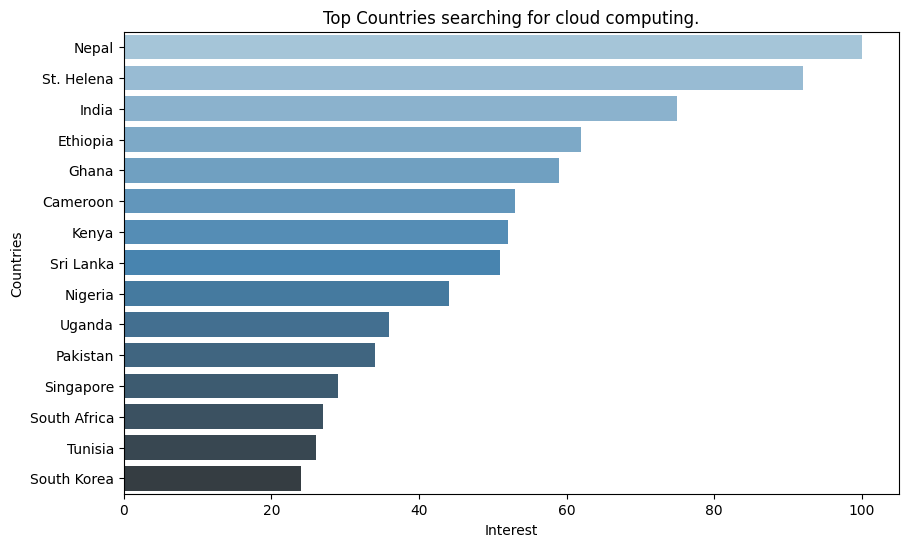

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette= 'Blues_d')
plt.title(f"Top Countries searching for {keyword}.")
plt.xlabel("Interest")
plt.ylabel("Countries")
plt.show()

World Map

In [ ]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    title=f"Search Interest for {keyword} by Country.",
                    color_continuous_scale='Reds')
fig.show()

Time wise Interest

In [ ]:
time_df = pytrends.interest_over_time()

/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



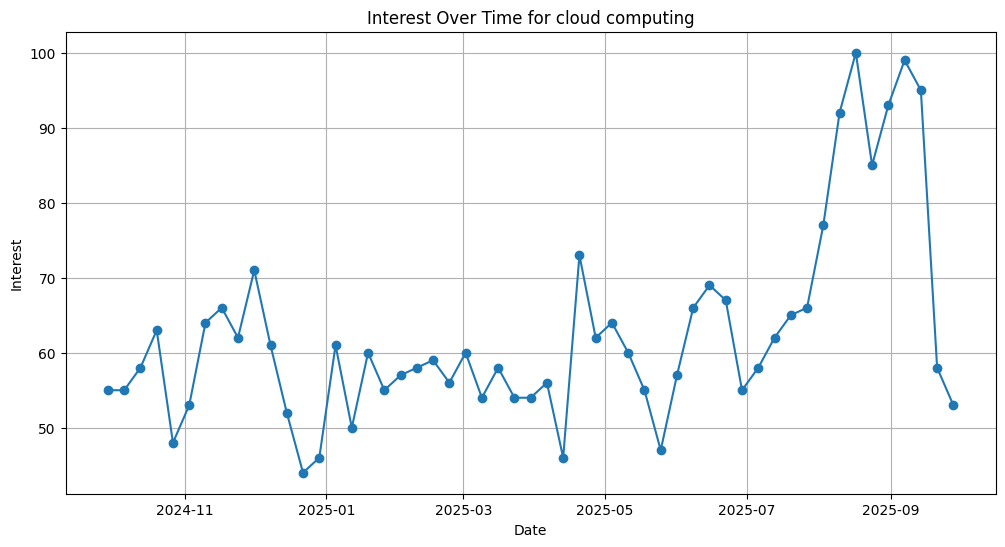

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(time_df.index, time_df[keyword], marker='o', linestyle='-')
plt.title(f"Interest Over Time for {keyword}")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

Multiple keywords compaire

In [ ]:
kw_list = ["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe="today 12-m", geo="", gprop="")

/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



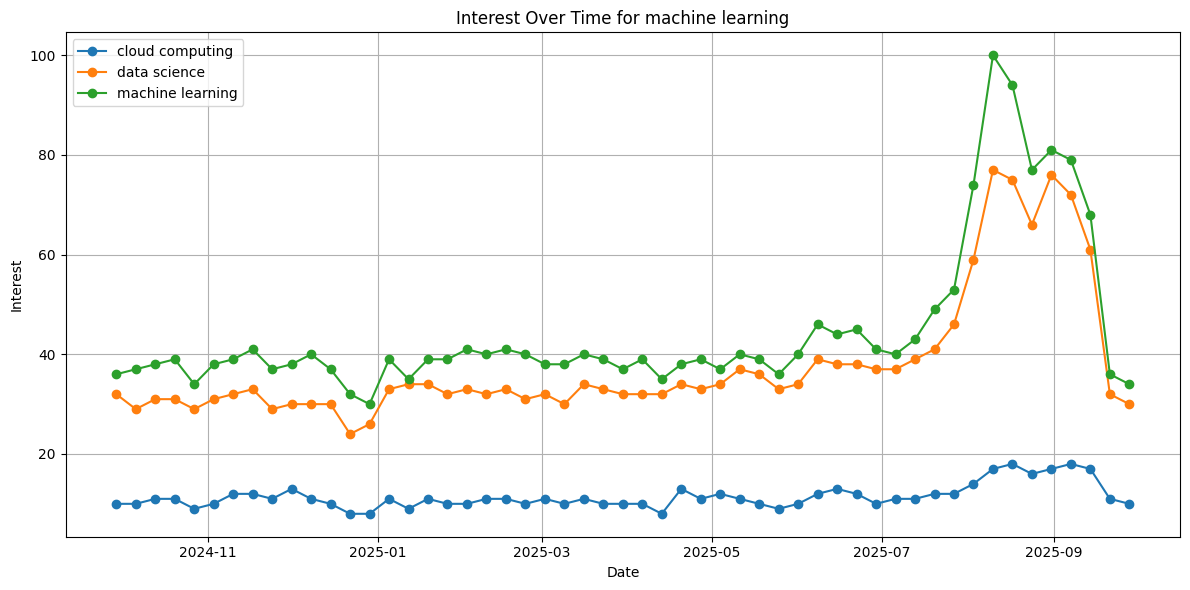

In [ ]:
campare_df = pytrends.interest_over_time()

plt.figure(figsize=(12, 6))
for kw in kw_list:
  plt.plot(campare_df.index, campare_df[kw], marker='o', linestyle='-', label=kw)
plt.title(f"Interest Over Time for {kw}")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()